In [75]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [46]:
# Set User-Agent
headers = {'User-Agent': 'MyBot/1.0 (athulyavijayan351@gmail.com)'}

url = "https://en.wikipedia.org/wiki/The_World%27s_Billionaires"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

all_data = []
years = range(2015, 2026)  # 2015–2025

# Find all headings (h2/h3/h4)
headings = soup.find_all(['h2', 'h3', 'h4'])

for heading in headings:
    text = heading.get_text()
    match = re.search(r'\b(20\d{2})\b', text)
    if match:
        year = int(match.group(1))
        if year in years:
            print(f"📅 Found section for {year}")
            table = heading.find_next('table', {'class': 'wikitable'})
            if table:
                for row in table.find_all('tr')[1:]:
                    cols = row.find_all(['td', 'th'])
                    data = [col.get_text(strip=True) for col in cols]
                    data.insert(0, year)
                    all_data.append(data)
            else:
                print(f"⚠️ No table found for {year}")

# Define column names
columns = ['Year','No.', 'Name', 'Net worth (USD)', 'Age', 'Nationality', 'Source(s) of wealth']

# Create DataFrame
df = pd.DataFrame(all_data, columns=columns[:len(all_data[0])])  # Adjust dynamically
print(df.head())


📅 Found section for 2025
📅 Found section for 2024
📅 Found section for 2023
📅 Found section for 2022
📅 Found section for 2021
📅 Found section for 2020
📅 Found section for 2019
📅 Found section for 2018
📅 Found section for 2017
📅 Found section for 2016
📅 Found section for 2015
   Year No.                     Name Net worth (USD) Age  \
0  2025   1                Elon Musk    $342 billion  53   
1  2025   2          Mark Zuckerberg    $216 billion  40   
2  2025   3               Jeff Bezos    $215 billion  61   
3  2025   4            Larry Ellison    $192 billion  80   
4  2025   5  Bernard Arnault& family    $178 billion  76   

                       Nationality Source(s) of wealth  
0  South AfricaCanadaUnited States      TeslaandSpaceX  
1                    United States      Meta Platforms  
2                    United States              Amazon  
3                    United States  Oracle Corporation  
4                           France                LVMH  


In [48]:
# Save to CSV
df.to_csv('billionaires_2015_2025.csv', index=False)
print("✅ Saved to 'billionaires_2015_2025.csv'")

✅ Saved to 'billionaires_2015_2025.csv'


In [49]:
df_billionaires =pd.read_csv('billionaires_2015_2025.csv')

In [50]:
df_billionaires

,Year,No.,Name,Net worth (USD),Age,Nationality,Source(s) of wealth
0,2025,1,Elon Musk,$342 billion,53,South AfricaCanadaUnited States,TeslaandSpaceX
1,2025,2,Mark Zuckerberg,$216 billion,40,United States,Meta Platforms
2,2025,3,Jeff Bezos,$215 billion,61,United States,Amazon
3,2025,4,Larry Ellison,$192 billion,80,United States,Oracle Corporation
4,2025,5,Bernard Arnault& family,$178 billion,76,France,LVMH
...,...,...,...,...,...,...,...
105,2015,6,Charles Koch,$42.9 billion,79,United States,Koch Industries
106,2015,6,David Koch,$42.9 billion,74,United States,Koch Industries
107,2015,8,Christy Walton,$41.7 billion,66,United States,Walmart
108,2015,9,Jim Walton,$40.6 billion,66,United States,Walmart


In [51]:
df_billionaires.head()

,Year,No.,Name,Net worth (USD),Age,Nationality,Source(s) of wealth
0,2025,1,Elon Musk,$342 billion,53,South AfricaCanadaUnited States,TeslaandSpaceX
1,2025,2,Mark Zuckerberg,$216 billion,40,United States,Meta Platforms
2,2025,3,Jeff Bezos,$215 billion,61,United States,Amazon
3,2025,4,Larry Ellison,$192 billion,80,United States,Oracle Corporation
4,2025,5,Bernard Arnault& family,$178 billion,76,France,LVMH


In [52]:
df_billionaires.tail()


,Year,No.,Name,Net worth (USD),Age,Nationality,Source(s) of wealth
105,2015,6,Charles Koch,$42.9 billion,79,United States,Koch Industries
106,2015,6,David Koch,$42.9 billion,74,United States,Koch Industries
107,2015,8,Christy Walton,$41.7 billion,66,United States,Walmart
108,2015,9,Jim Walton,$40.6 billion,66,United States,Walmart
109,2015,10,Liliane Bettencourt,$40.1 billion,92,France,L'Oreal


In [53]:
df_billionaires.shape

(110, 7)

In [54]:
df_billionaires.size

770

In [55]:
df_billionaires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year                 110 non-null    int64 
 1   No.                  110 non-null    int64 
 2   Name                 110 non-null    object
 3   Net worth (USD)      110 non-null    object
 4   Age                  110 non-null    int64 
 5   Nationality          110 non-null    object
 6   Source(s) of wealth  110 non-null    object
dtypes: int64(3), object(4)
memory usage: 6.1+ KB


In [56]:
df_billionaires.describe()

,Year,No.,Age
count,110.00000,110.000000,110.000000
mean,2020.00000,5.463636,67.745455
std,3.17675,2.850003,15.053688
min,2015.00000,1.000000,31.000000
25%,2017.00000,3.000000,58.250000
50%,2020.00000,5.500000,70.500000
75%,2023.00000,8.000000,78.000000
max,2025.00000,10.000000,94.000000


### DATA CLEANING

In [21]:
# Clean Net worth (USD)
    # Remove $ and billion
    # Handle non-breaking spaces (\xa0)
    # Convert to numeric (float) values in billions.

In [57]:
df_billionaires['Net worth (USD)'] = (
   df_billionaires['Net worth (USD)']
    .str.replace(r'[\$,]', '', regex=True)
    .str.replace(r'\s*billion', '', regex=True)
    .str.replace('\xa0', '', regex=True)
    .astype(float)
  )


In [58]:
df_billionaires

,Year,No.,Name,Net worth (USD),Age,Nationality,Source(s) of wealth
0,2025,1,Elon Musk,342.0,53,South AfricaCanadaUnited States,TeslaandSpaceX
1,2025,2,Mark Zuckerberg,216.0,40,United States,Meta Platforms
2,2025,3,Jeff Bezos,215.0,61,United States,Amazon
3,2025,4,Larry Ellison,192.0,80,United States,Oracle Corporation
4,2025,5,Bernard Arnault& family,178.0,76,France,LVMH
...,...,...,...,...,...,...,...
105,2015,6,Charles Koch,42.9,79,United States,Koch Industries
106,2015,6,David Koch,42.9,74,United States,Koch Industries
107,2015,8,Christy Walton,41.7,66,United States,Walmart
108,2015,9,Jim Walton,40.6,66,United States,Walmart


In [ ]:
# Standardize Nationality - Many entries have concatenated country names like: "South AfricaCanadaUnited States"

In [59]:
import re

df_billionaires['Nationality'] = df['Nationality'].apply(
    lambda x: ', '.join(re.findall(r'[A-Z][a-z]+(?:\s[A-Z][a-z]+)*', x))
)


In [60]:
df_billionaires

,Year,No.,Name,Net worth (USD),Age,Nationality,Source(s) of wealth
0,2025,1,Elon Musk,342.0,53,"South Africa, Canada, United States",TeslaandSpaceX
1,2025,2,Mark Zuckerberg,216.0,40,United States,Meta Platforms
2,2025,3,Jeff Bezos,215.0,61,United States,Amazon
3,2025,4,Larry Ellison,192.0,80,United States,Oracle Corporation
4,2025,5,Bernard Arnault& family,178.0,76,France,LVMH
...,...,...,...,...,...,...,...
105,2015,6,Charles Koch,42.9,79,United States,Koch Industries
106,2015,6,David Koch,42.9,74,United States,Koch Industries
107,2015,8,Christy Walton,41.7,66,United States,Walmart
108,2015,9,Jim Walton,40.6,66,United States,Walmart


In [ ]:
#Clean “Source(s) of wealth)” 

In [61]:
df_billionaires['Source(s) of wealth'] = df_billionaires['Source(s) of wealth'].str.replace('and', ', ')

In [62]:
df_billionaires

,Year,No.,Name,Net worth (USD),Age,Nationality,Source(s) of wealth
0,2025,1,Elon Musk,342.0,53,"South Africa, Canada, United States","Tesla, SpaceX"
1,2025,2,Mark Zuckerberg,216.0,40,United States,Meta Platforms
2,2025,3,Jeff Bezos,215.0,61,United States,Amazon
3,2025,4,Larry Ellison,192.0,80,United States,Oracle Corporation
4,2025,5,Bernard Arnault& family,178.0,76,France,LVMH
...,...,...,...,...,...,...,...
105,2015,6,Charles Koch,42.9,79,United States,Koch Industries
106,2015,6,David Koch,42.9,74,United States,Koch Industries
107,2015,8,Christy Walton,41.7,66,United States,Walmart
108,2015,9,Jim Walton,40.6,66,United States,Walmart


In [ ]:
# Handle missing or inconsistent data

In [63]:
print(df.isna().sum())
df_billionaires.drop_duplicates(inplace=True)

Year                   0
No.                    0
Name                   0
Net worth (USD)        0
Age                    0
Nationality            0
Source(s) of wealth    0
dtype: int64


In [ ]:
# 2. Exploratory Data Analysis (EDA)

In [ ]:
#1.Top 10 Billionaires of 2025

In [66]:
# Clean columns just in case
df_billionaires.columns = df_billionaires.columns.str.strip()

# Display top 10 billionaires for 2025
top_2025 = df_billionaires[df_billionaires['Year'] == 2025].sort_values('Net worth (USD)', ascending=False).head(10)
top_2025


,Year,No.,Name,Net worth (USD),Age,Nationality,Source(s) of wealth
0,2025,1,Elon Musk,342.0,53,"South Africa, Canada, United States","Tesla, SpaceX"
1,2025,2,Mark Zuckerberg,216.0,40,United States,Meta Platforms
2,2025,3,Jeff Bezos,215.0,61,United States,Amazon
3,2025,4,Larry Ellison,192.0,80,United States,Oracle Corporation
4,2025,5,Bernard Arnault& family,178.0,76,France,LVMH
5,2025,6,Warren Buffett,154.0,94,United States,Berkshire Hathaway
6,2025,7,Larry Page,144.0,52,United States,Google
7,2025,8,Sergey Brin,138.0,51,United States,Google
8,2025,9,Amancio Ortega,124.0,89,Spain,"Inditex,Zara"
9,2025,10,Steve Ballmer,118.0,69,United States,Microsoft


In [ ]:
#2.Net Worth Growth by Year (Top Billionaire Each Year)

In [68]:
top_by_year = df_billionaires.loc[df_billionaires.groupby('Year')['Net worth (USD)'].idxmax(), ['Year', 'Name', 'Net worth (USD)']]
top_by_year

,Year,Name,Net worth (USD)
100,2015,Bill Gates,79.2
90,2016,Bill Gates,75.0
80,2017,Bill Gates,86.0
70,2018,Jeff Bezos,112.0
60,2019,Jeff Bezos,131.0
50,2020,Jeff Bezos,113.0
40,2021,Jeff Bezos,177.0
30,2022,Elon Musk,219.0
20,2023,Bernard Arnault& family,211.0
10,2024,Bernard Arnault& family,233.0


In [ ]:
# 3. Average Net Worth by Year

In [70]:
avg_worth = df_billionaires.groupby('Year')['Net worth (USD)'].mean().reset_index()
avg_worth

,Year,Net worth (USD)
0,2015,55.60
1,2016,50.54
2,2017,61.25
3,2018,74.46
4,2019,74.38
5,2020,68.64
6,2021,115.30
7,2022,130.71
8,2023,117.36
9,2024,155.20


In [ ]:
# 4.Top Nationalities by Count

In [71]:
nationality_counts = df_billionaires['Nationality'].value_counts().head(10)
nationality_counts

Nationality
United States                          79
France                                  9
Spain                                   7
Mexico                                  6
South Africa, Canada, United States     5
India                                   4
Name: count, dtype: int64

In [ ]:
#5.Most Common Wealth Sources

In [72]:
wealth_sources = df['Source(s) of wealth'].value_counts().head(10)
wealth_sources

Source(s) of wealth
Microsoft             14
Oracle Corporation    11
Berkshire Hathaway    11
Amazon                10
Koch Industries        8
LVMH                   8
Google                 8
Inditex,Zara           5
Facebook, Inc.         5
Walmart                5
Name: count, dtype: int64

# 3. Visualization Ideas

In [ ]:
# Average net worth by year

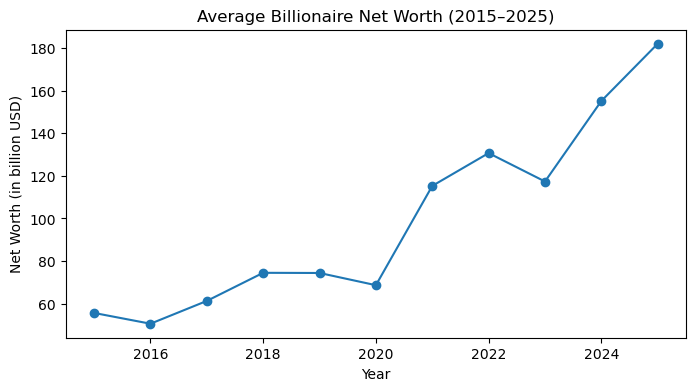

In [73]:
plt.figure(figsize=(8,4))
plt.plot(avg_worth['Year'], avg_worth['Net worth (USD)'], marker='o')
plt.title('Average Billionaire Net Worth (2015–2025)')
plt.xlabel('Year')
plt.ylabel('Net Worth (in billion USD)')
plt.show()

In [ ]:
# Top 10 Billionaires (2025)

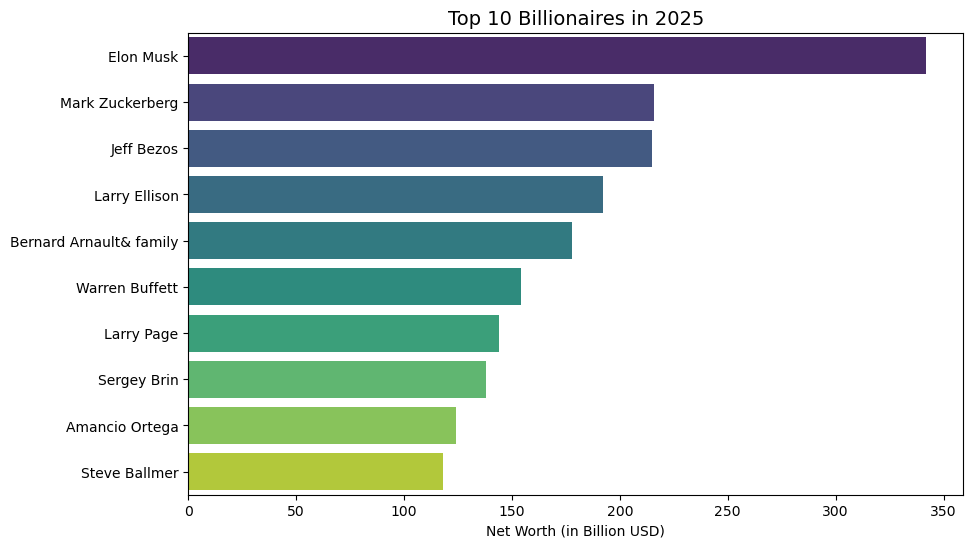

In [80]:

top_2025 = df_billionaires[df_billionaires['Year'] == 2025].sort_values('Net worth (USD)', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_2025, y='Name', x='Net worth (USD)',  hue='Name',  legend=False, palette='viridis')
plt.title('Top 10 Billionaires in 2025', fontsize=14)
plt.xlabel('Net Worth (in Billion USD)')
plt.ylabel('')
plt.show()


In [ ]:
# Top 10 Countries by Billionaire Count

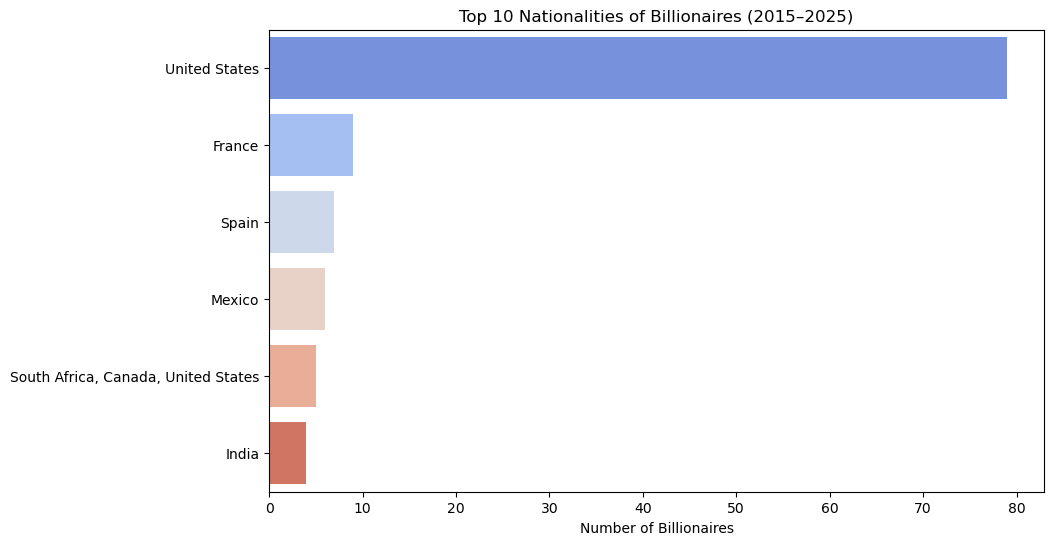

In [82]:
top_countries = df_billionaires['Nationality'].value_counts().head(10).reset_index()
top_countries.columns = ['Country', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, y='Country', x='Count',  hue='Country',  legend=False, palette='coolwarm' )
plt.title('Top 10 Nationalities of Billionaires (2015–2025)')
plt.xlabel('Number of Billionaires')
plt.ylabel('')
plt.show()


In [ ]:
# Most Common Sources of Wealth

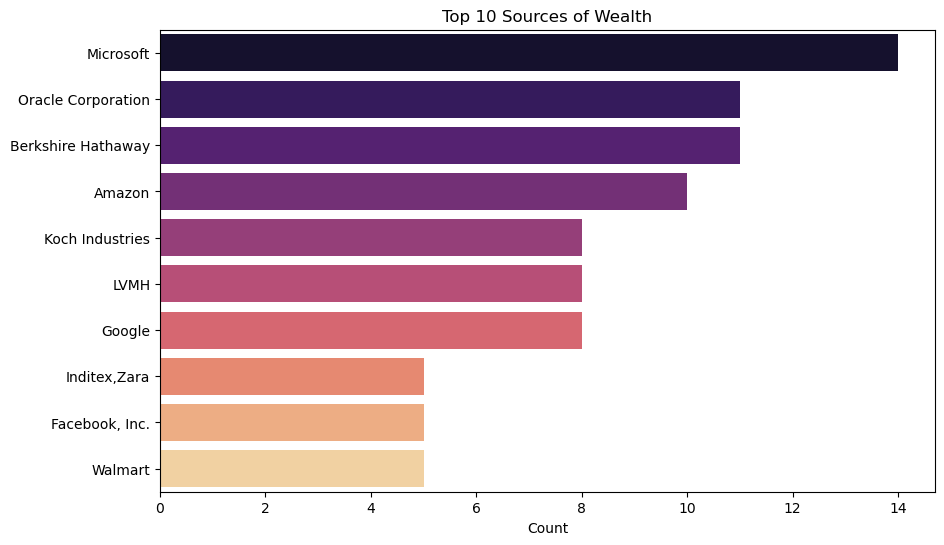

In [84]:
top_sources = df_billionaires['Source(s) of wealth'].value_counts().head(10).reset_index()
top_sources.columns = ['Source of Wealth', 'Count']

plt.figure(figsize=(10,6))
sns.barplot(data=top_sources, y='Source of Wealth', x='Count', hue='Source of Wealth',  legend=False, palette='magma')
plt.title('Top 10 Sources of Wealth')
plt.xlabel('Count')
plt.ylabel('')
plt.show()


In [ ]:
# Age Distribution of Billionaires

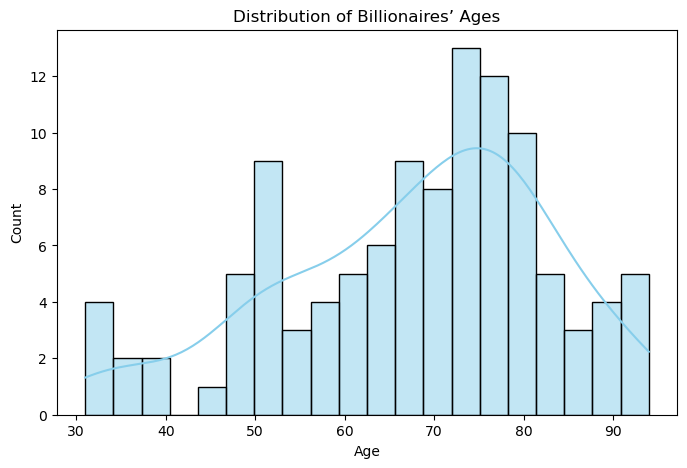

In [85]:
plt.figure(figsize=(8,5))
sns.histplot(df_billionaires['Age'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribution of Billionaires’ Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:
# Net Worth vs Age Scatterplot

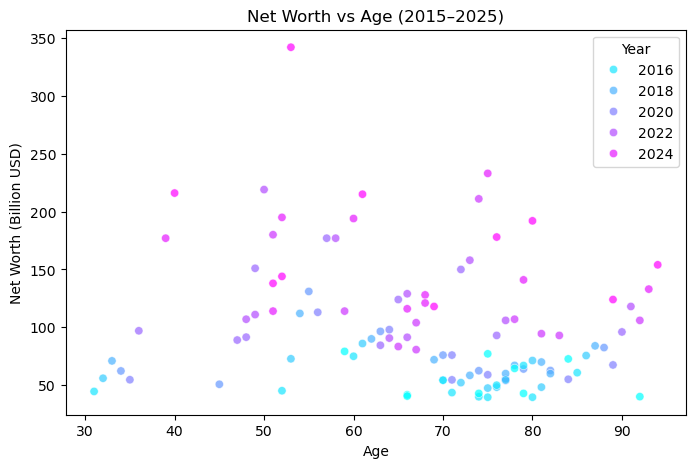

In [86]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_billionaires, x='Age', y='Net worth (USD)', hue='Year', palette='cool', alpha=0.7)
plt.title('Net Worth vs Age (2015–2025)')
plt.xlabel('Age')
plt.ylabel('Net Worth (Billion USD)')
plt.show()


In [ ]:
# Top Billionaire Each Year

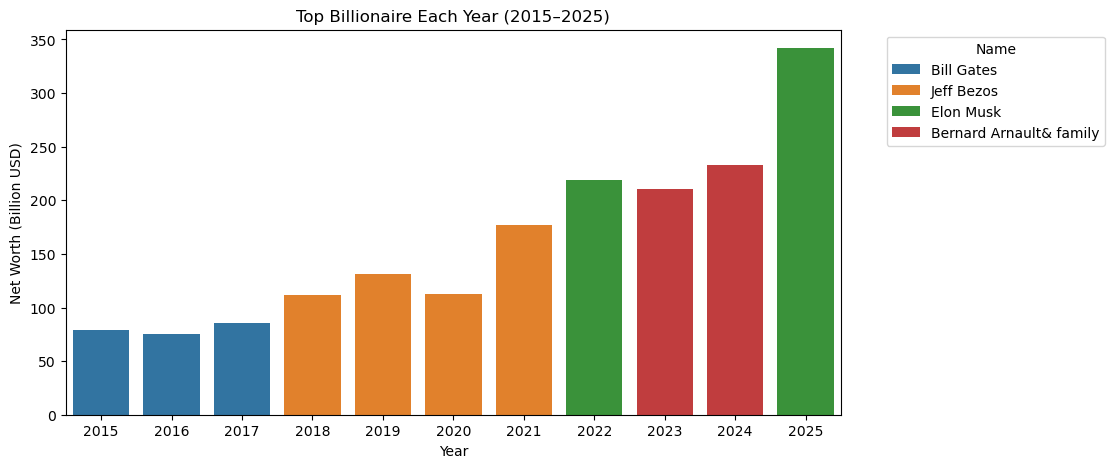

In [87]:
top_each_year = df_billionaires.loc[df_billionaires.groupby('Year')['Net worth (USD)'].idxmax()][['Year', 'Name', 'Net worth (USD)']]

plt.figure(figsize=(10,5))
sns.barplot(data=top_each_year, x='Year', y='Net worth (USD)', hue='Name', dodge=False)
plt.title('Top Billionaire Each Year (2015–2025)')
plt.ylabel('Net Worth (Billion USD)')
plt.legend(title='Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
#Correlation Heatmap

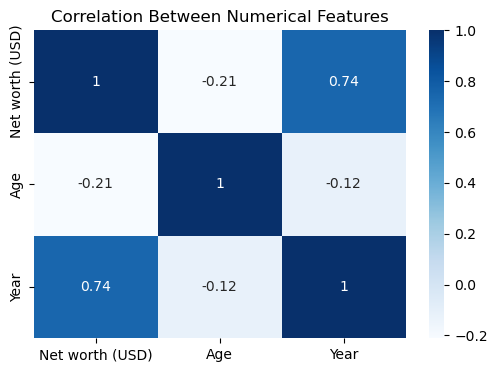

In [88]:
plt.figure(figsize=(6,4))
sns.heatmap(df_billionaires[['Net worth (USD)', 'Age', 'Year']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Numerical Features')
plt.show()
